In [1]:
################################################################################
# Filename: frequency_analysis.py
# Purpose:  Visualize the frequencies of audio file and convert into MIDI file.
# Author:   Roshni Venkat & Livia Chandra
#
# Description:
# This file is used to visualize the frequencies of audio file in frequency
# graph which help converting frequencies into MIDI file.
#
# Usage (Optional):
# [Instructions or examples demonstrating how to use the code in this file.
# Include any dependencies or prerequisites required for proper usage.]
#
# Notes:
# [Any additional notes, considerations, or important information
# about the file that may be relevant to developers or users.]
#
###############################################################################

In [2]:
import numpy as np
import scipy.io.wavfile as wav
import librosa as lb
import matplotlib.pyplot as plt 
from mido import MidiFile, MidiTrack, Message

In [3]:
# Read the WAV file using spicy wavfile library
sample_rate1, raw_audio1 = wav.read('sample1.wav')
sample_rate1

44100

In [4]:
raw_audio1

array([[-1904, -1904],
       [-1000, -1000],
       [ 2482,  2482],
       ...,
       [ 1889,  1889],
       [ 1744,  1744],
       [ 1597,  1597]], dtype=int16)

In [5]:
# Compute the Fourier Transform
frequency1 = np.fft.fftfreq(len(raw_audio1)) * sample_rate1
spectrum1 = np.fft.fft(raw_audio1)  

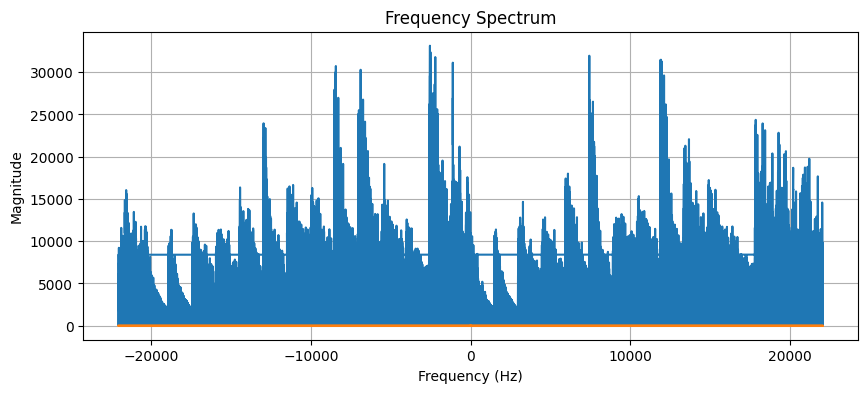

In [6]:
# Plot the frequencies
plt.figure(figsize=(10, 4))
plt.plot(frequency1, np.abs(spectrum1))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [7]:
# Use the librosa function to convert frequencies into midi note
converted_frequency1 = []
for frequency in frequency1:
    if frequency != 0:
        converted_frequency1.append(lb.hz_to_midi(frequency))
    else:
        converted_frequency1.append(0)

/home/livia/.local/lib/python3.10/site-packages/librosa/core/convert.py:1095: RuntimeWarning: invalid value encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


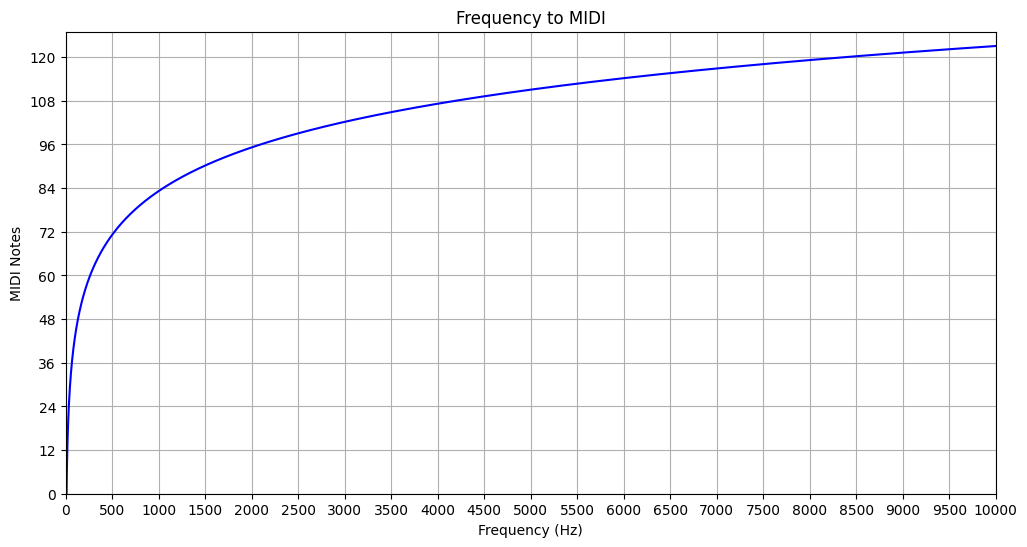

In [8]:
# Plot the frequency against the MIDI note
plt.figure(figsize=(12, 6))
plt.plot(frequency1, converted_frequency1, color='blue')
plt.title('Frequency to MIDI')
plt.xlabel('Frequency (Hz)')
plt.ylabel('MIDI Notes')
plt.grid(True)
plt.xlim(0, 10000)  # Limit x-axis to focus on lower frequencies
plt.ylim(0, 127)    # Limit y-axis to MIDI note range
plt.xticks(np.arange(0, 10001, 500))  # Set x-axis ticks every 500 Hz
plt.yticks(np.arange(0, 128, 12))     # Set y-axis ticks every octave
plt.show()

In [9]:
# Test output by creating a new MIDI file
mid = MidiFile()

# Add a track to the MIDI file
track = MidiTrack()
mid.tracks.append(track)

# Iterate over the converted frequencies and add note on/off messages to the track
for midi_note in converted_frequency1:
    if 0 <= midi_note <= 127:  # Skip MIDI notes with value 0
        midi_note = int(np.abs(midi_note))
        track.append(Message('note_on', note = midi_note, velocity = 64, time=0))  # Note on message
        track.append(Message('note_off', note = midi_note, velocity = 0, time=480))  # Note off message

# Save the MIDI file
mid.save('sample1_wavfile.mid')

In [10]:
# Read the WAV file using librosa library
raw_audio2, sample_rate2 = lb.load('sample1.wav')
raw_audio2

array([-0.03851133,  0.04146759,  0.01639824, ...,  0.06243297,
        0.06134623,  0.03674722], dtype=float32)

In [11]:
sample_rate2

22050

In [12]:
frequency2 = np.fft.fftfreq(len(raw_audio2)) * sample_rate2
spectrum2 = np.fft.fft(raw_audio2)

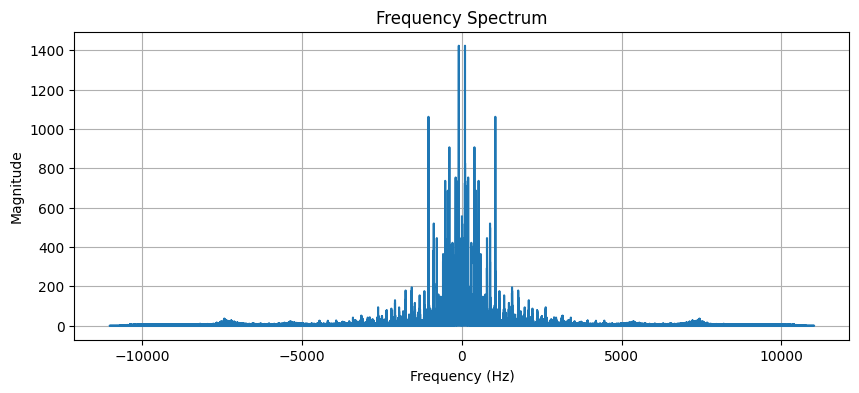

In [13]:
# Plot the frequencies using librosa library
plt.figure(figsize=(10, 4))
plt.plot(frequency2, np.abs(spectrum2))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [14]:
# Use the librosa function to convert frequencies into midi note
converted_frequency2 = []
for frequency in frequency2:
    if frequency != 0:
        converted_frequency2.append(lb.hz_to_midi(frequency))
    else:
        converted_frequency2.append(0)

/home/livia/.local/lib/python3.10/site-packages/librosa/core/convert.py:1095: RuntimeWarning: invalid value encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


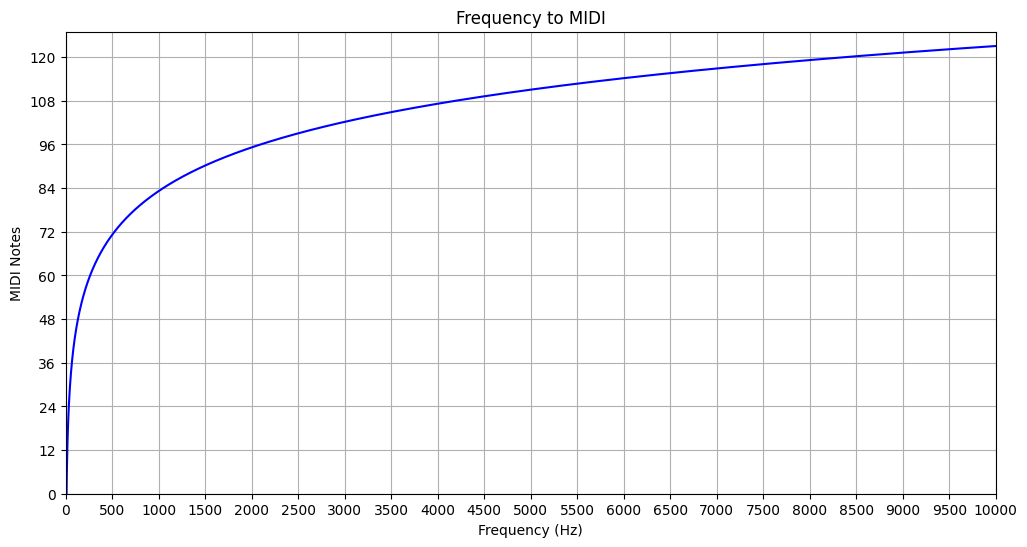

In [15]:
# Plot the frequency against the MIDI note
plt.figure(figsize=(12, 6))
plt.plot(frequency2, converted_frequency2, color='blue')
plt.title('Frequency to MIDI')
plt.xlabel('Frequency (Hz)')
plt.ylabel('MIDI Notes')
plt.grid(True)
plt.xlim(0, 10000)  # Limit x-axis to focus on lower frequencies
plt.ylim(0, 127)    # Limit y-axis to MIDI note range
plt.xticks(np.arange(0, 10001, 500))  # Set x-axis ticks every 500 Hz
plt.yticks(np.arange(0, 128, 12))     # Set y-axis ticks every octave
plt.show()

In [16]:
# Test output by creating a new MIDI file
mid2 = MidiFile()

# Add a track to the MIDI file
track2 = MidiTrack()
mid2.tracks.append(track2)

# Iterate over the converted frequencies and add note on/off messages to the track
for midi_note in converted_frequency2:
    if 0 <= midi_note <= 127:  # Skip MIDI notes with value 0
        midi_note = int(np.abs(midi_note))
        track.append(Message('note_on', note = midi_note, velocity = 64, time=0))  # Note on message
        track.append(Message('note_off', note = midi_note, velocity = 0, time=480))  # Note off message

# Save the MIDI file
mid.save('sample1_librosa.mid')